In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import accuracy_score
import requests

data = pd.read_csv('abalone_dataset.csv')
data_app = pd.read_csv('abalone_app.csv')


In [112]:
data.head()

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,type
0,M,0.535,0.420,0.150,0.6995,0.2575,0.1530,0.2400,3
1,I,0.510,0.380,0.115,0.5155,0.2150,0.1135,0.1660,1
2,I,0.185,0.130,0.045,0.0290,0.0120,0.0075,0.0095,1
3,M,0.550,0.450,0.170,0.8100,0.3170,0.1570,0.2200,3
4,I,0.535,0.415,0.150,0.5765,0.3595,0.1350,0.2250,1


In [113]:
data.isnull().sum()

sex               0
length            0
diameter          0
height            0
whole_weight      0
shucked_weight    0
viscera_weight    0
shell_weight      0
type              0
dtype: int64

In [114]:
data = pd.get_dummies(data, columns=['sex'], drop_first=True)
data_app = pd.get_dummies(data_app, columns=['sex'], drop_first=True)

In [115]:
data

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,type,sex_I,sex_M
0,0.535,0.420,0.150,0.6995,0.2575,0.1530,0.2400,3,False,True
1,0.510,0.380,0.115,0.5155,0.2150,0.1135,0.1660,1,True,False
2,0.185,0.130,0.045,0.0290,0.0120,0.0075,0.0095,1,True,False
3,0.550,0.450,0.170,0.8100,0.3170,0.1570,0.2200,3,False,True
4,0.535,0.415,0.150,0.5765,0.3595,0.1350,0.2250,1,True,False
...,...,...,...,...,...,...,...,...,...,...
3127,0.545,0.405,0.175,0.9800,0.2585,0.2070,0.3800,3,False,False
3128,0.655,0.525,0.185,1.2590,0.4870,0.2215,0.4450,3,False,True
3129,0.450,0.340,0.120,0.4925,0.2410,0.1075,0.1200,1,True,False
3130,0.520,0.410,0.155,0.7270,0.2910,0.1835,0.2350,3,False,False


In [116]:
#le = LabelEncoder()
#data['sex'] = le.fit_transform(data['sex'])

In [117]:
columns = ['length', 'diameter', 'height', 'whole_weight', 'shucked_weight', 'viscera_weight', 'shell_weight', 'sex_I', 'sex_M']
#columns = ['sex', 'length', 'diameter', 'height', 'whole_weight', 'shucked_weight', 'viscera_weight', 'shell_weight']

X = data[columns]
y = data.type

data_app = data_app[columns]

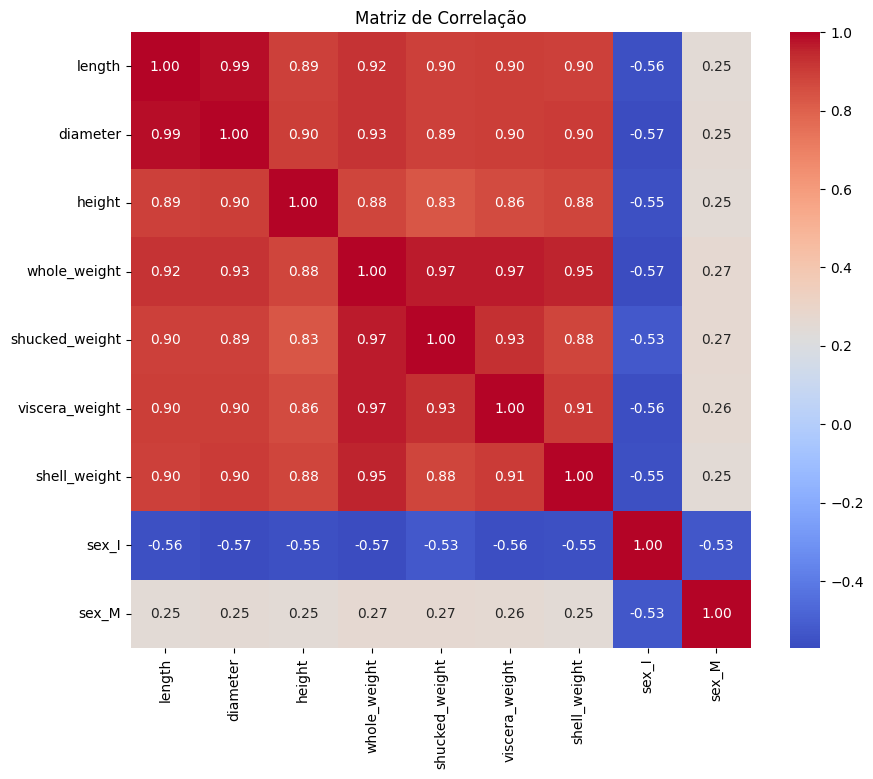

In [118]:
matriz = data[columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(matriz, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação')
plt.show()

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [120]:
scaler = MinMaxScaler()
data = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [121]:
data_app_normal = scaler.transform(data_app)

In [122]:

k_values = range(1, 21)
cv_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())
    print(f"k={k}: CV Score = {scores.mean():.4f}")

best_k = k_values[np.argmax(cv_scores)]
best_score = max(cv_scores)

print('best_score = ', best_k,  best_score)


k=1: CV Score = 0.5775
k=2: CV Score = 0.5671
k=3: CV Score = 0.6063
k=4: CV Score = 0.6136
k=5: CV Score = 0.6259
k=6: CV Score = 0.6236
k=7: CV Score = 0.6314
k=8: CV Score = 0.6241
k=9: CV Score = 0.6400
k=10: CV Score = 0.6318
k=11: CV Score = 0.6332
k=12: CV Score = 0.6373
k=13: CV Score = 0.6391
k=14: CV Score = 0.6369
k=15: CV Score = 0.6414
k=16: CV Score = 0.6423
k=17: CV Score = 0.6423
k=18: CV Score = 0.6464
k=19: CV Score = 0.6414
k=20: CV Score = 0.6419
best_score =  18 0.6464318032889194


In [123]:
modelo = KNeighborsClassifier(n_neighbors=best_k)
modelo.fit(X, y)

y_pred = modelo.predict(data_app_normal)
a = modelo.predict(data_app)

print(type(y_pred))
print(type(a))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


c:\Users\Felipe\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [124]:

# Enviando previsões realizadas com o modelo para o servidor
URL = "https://aydanomachado.com/mlclass/03_Validation.php"

#TODO Substituir pela sua chave aqui
DEV_KEY = "Turing"

# json para ser enviado para o servidor
data = {'dev_key':DEV_KEY,
        'predictions':pd.Series(y_pred).to_json(orient='values')}

# Enviando requisição e salvando o objeto resposta
r = requests.post(url = URL, data = data)

# Extraindo e imprimindo o texto da resposta
pastebin_url = r.text
print(" - Resposta do servidor:\n", r.text, "\n")

 - Resposta do servidor:
 {"status":"success","dev_key":"Turing","accuracy":0.5311004784688995,"old_accuracy":0} 

